Name - Win Yu Maung,
ID - 6612054,
Sec - 542

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import numpy as np

In [48]:
ad_conversion = pd.read_csv('ad_conversion.csv')

ad_conversion.head()

,spent_usd,n_impressions,n_clicks
0,1.43,7350,1
1,1.82,17861,2
2,1.25,4259,1
3,1.29,4133,1
4,4.77,15615,3


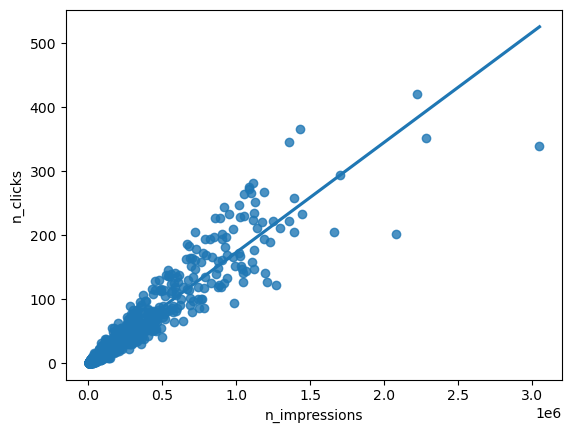

In [49]:
sns.regplot(x = 'n_impressions', y = 'n_clicks', data = ad_conversion, ci = None)

plt.show()

In [50]:
ad_conversion['qdrt_n_impressions'] = ad_conversion['n_impressions'] ** 0.25

ad_conversion.head()

,spent_usd,n_impressions,n_clicks,qdrt_n_impressions
0,1.43,7350,1,9.259165
1,1.82,17861,2,11.560495
2,1.25,4259,1,8.078429
3,1.29,4133,1,8.018006
4,4.77,15615,3,11.178551


In [51]:
ad_conversion['qdrt_n_clicks'] = ad_conversion['n_clicks'] ** 0.25

ad_conversion.head()

,spent_usd,n_impressions,n_clicks,qdrt_n_impressions,qdrt_n_clicks
0,1.43,7350,1,9.259165,1.000000
1,1.82,17861,2,11.560495,1.189207
2,1.25,4259,1,8.078429,1.000000
3,1.29,4133,1,8.018006,1.000000
4,4.77,15615,3,11.178551,1.316074


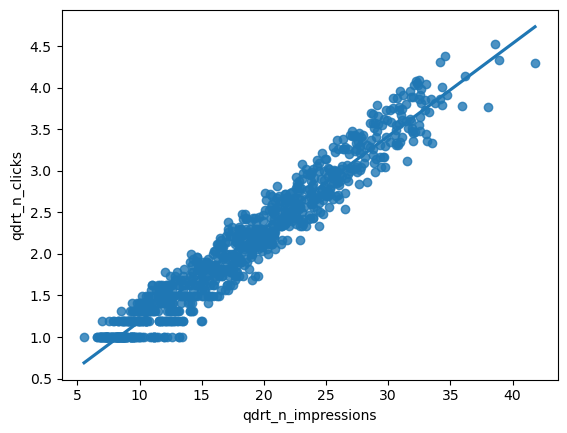

In [65]:
sns.regplot(x = 'qdrt_n_impressions', y = 'qdrt_n_clicks', data = ad_conversion, ci = None)

plt.show()

In [53]:
mdl_click_vs_impression = ols('qdrt_n_clicks ~ qdrt_n_impressions', data = ad_conversion).fit()

print(mdl_click_vs_impression.params)

Intercept             0.071748
qdrt_n_impressions    0.111533
dtype: float64


In [54]:
explanatory_data = pd.DataFrame({'qdrt_n_impressions' : np.arange(0,3500000,500000)** 0.25,
                                'n_impressions' : np.arange(0,3500000,500000)})

explanatory_data

,qdrt_n_impressions,n_impressions
0,0.000000,0
1,26.591479,500000
2,31.622777,1000000
3,34.996355,1500000
4,37.606031,2000000
5,39.763536,2500000
6,41.617915,3000000


In [55]:
prediction_data = explanatory_data.assign(
    qdrt_n_clicks = mdl_click_vs_impression.predict(explanatory_data)
)

prediction_data

,qdrt_n_impressions,n_impressions,qdrt_n_clicks
0,0.000000,0,0.071748
1,26.591479,500000,3.037576
2,31.622777,1000000,3.598732
3,34.996355,1500000,3.974998
4,37.606031,2000000,4.266063
5,39.763536,2500000,4.506696
6,41.617915,3000000,4.713520


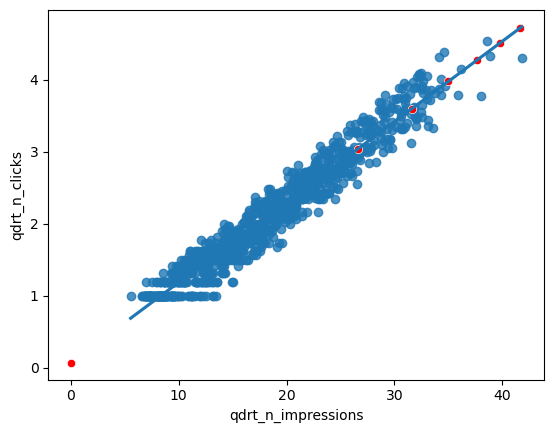

In [66]:
fig = plt.figure()

sns.regplot(x = 'qdrt_n_impressions', y = 'qdrt_n_clicks', data = ad_conversion, ci = None)

sns.scatterplot(x = 'qdrt_n_impressions', y = 'qdrt_n_clicks', data = prediction_data, color = 'red')

plt.show()

In [68]:
prediction_data['n_clicks'] = prediction_data['qdrt_n_clicks']**4

prediction_data.head()

,qdrt_n_impressions,n_impressions,qdrt_n_clicks,n_clicks
0,0.000000,0,0.071748,0.000026
1,26.591479,500000,3.037576,85.135121
2,31.622777,1000000,3.598732,167.725102
3,34.996355,1500000,3.974998,249.659131
4,37.606031,2000000,4.266063,331.214159


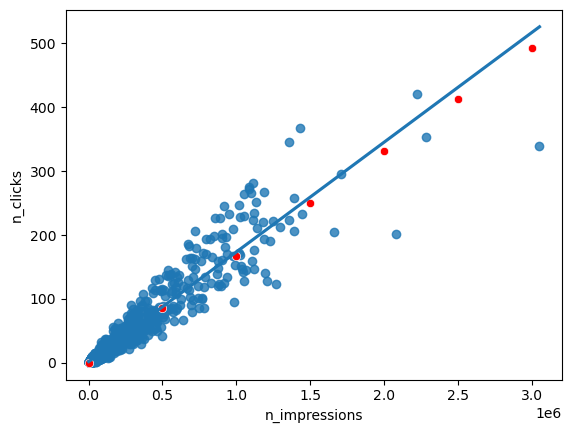

In [67]:
fig = plt.figure()

sns.regplot(x = 'n_impressions', y = 'n_clicks', data = ad_conversion, ci = None)

sns.scatterplot(x = 'n_impressions', y = 'n_clicks', data = prediction_data, color = 'red')

plt.show()

In [64]:
mdl_click_vs_impression.rsquared

0.9445272817143905

Since r_squared of that model is nearly 1 which is the best, this model is a good fit.

In [63]:
mse = mdl_click_vs_impression.mse_resid

print('mse: ', mse)

rse = np.sqrt(mse)

print('rse: ', rse)

mse:  0.038772133892971475
rse:  0.19690640896875722


The different between predicted n_clicks and observed n_clicks is typically 0.19 times.

Name - Win Yu Maung,
ID - 6612054,
Sec - 542